# SD212: Graph Learning
## Lab 3: Graph Clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [51]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership


## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [32]:
dataset = grid(10, 10, True)
adjacency = dataset.adjacency
position = dataset.position

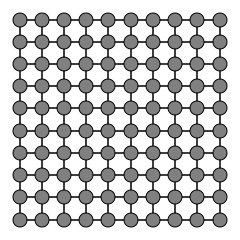

In [33]:
image = visualize_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity.

In [39]:
louvain = Louvain()

In [40]:
labels = louvain.fit_predict(adjacency)

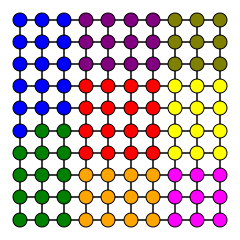

In [41]:
image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [42]:
get_modularity(adjacency, labels)

0.656712962962963

In [ ]:
# le meilleur c'est 3*3 clusters

labels = np.array ([3 * (i///3)+ j//3])

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [43]:
dataset = karate_club(metadata=True)

In [44]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

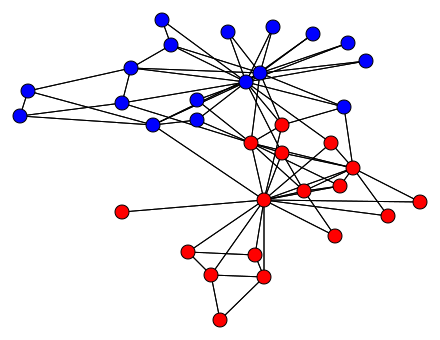

In [45]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels.
* Give the modularity.
* Display the aggregate graph (check this [tutorial](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html)).
* Adapt the resolution to get 2 clusters. Compare with the ground-truth.

In [46]:
louvain = Louvain()

In [47]:
labels = louvain.fit_predict(adjacency)

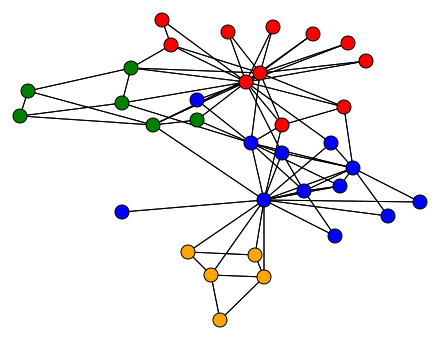

In [48]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [54]:
adjacency_aggregagte= louvain.aggregate_

In [52]:
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)


In [55]:
image = visualize_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique,
                  display_node_weight=True, node_weights=counts)
SVG(image)

NameError: name 'adjacency_aggregate' is not defined

## Openflights


In [ ]:
dataset = openflights

In [ ]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

In [ ]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? 
* List the top airport of each cluster in number of flights.
* Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.

## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Repeat the same experiments at resolution 2.

## 3. Bipartite graphs

## Cinema

In [ ]:
dataset = cinema

In [ ]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do

* Cluster the graph by Louvain (resolution 1). 
* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of these cluster in terms of Personalized PageRank.